In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
news = pd.read_csv('news.csv')

In [12]:
news.loc[news['label'] == 'FAKE',['text']]

,text
0,"Daniel Greenfield, a Shillman Journalism Fello..."
1,Google Pinterest Digg Linkedin Reddit Stumbleu...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
5,"\nI’m not an immigrant, but my grandparents ..."
6,"Share This Baylee Luciani (left), Screenshot o..."
...,...
6326,DOJ COMPLAINT: Comey Under Fire Over Partisan ...
6328,
6329,Julian Assange has claimed the Hillary Clinton...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...


In [4]:
import nltk

In [5]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopworda


    Error loading stopworda: Package 'stopworda' not found in index



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> stopwords
Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [6]:
news.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
title    6335 non-null object
text     6335 non-null object
label    6335 non-null object
dtypes: object(3)
memory usage: 148.6+ KB


In [8]:
news.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


In [9]:
news.groupby('label').describe()

title                                             text         \
      count unique                            top freq count unique   
label                                                                 
FAKE   3164   3107    Michael Moore Owes Me $4.99    3  3164   3071   
REAL   3171   3149  OnPolitics | 's politics blog    5  3171   2989   

                                                               
                                                     top freq  
label                                                          
FAKE                                                       36  
REAL   Killing Obama administration rules, dismantlin...   58

In [10]:
news['title_length'] = news['title'].apply(len)
news['text_length'] = news['text'].apply(len)

In [11]:
news.head()

,title,text,label,title_length,text_length
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7518
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,2646
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,2543
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,2660
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48,1840


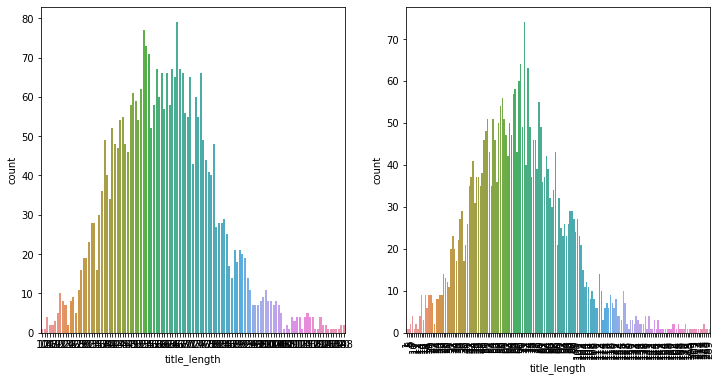

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,6))
sns.countplot(news[news['label'] == 'REAL']['title_length'], ax=ax1)
sns.countplot(news[news['label'] == 'FAKE']['title_length'], ax=ax2)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Title Length')

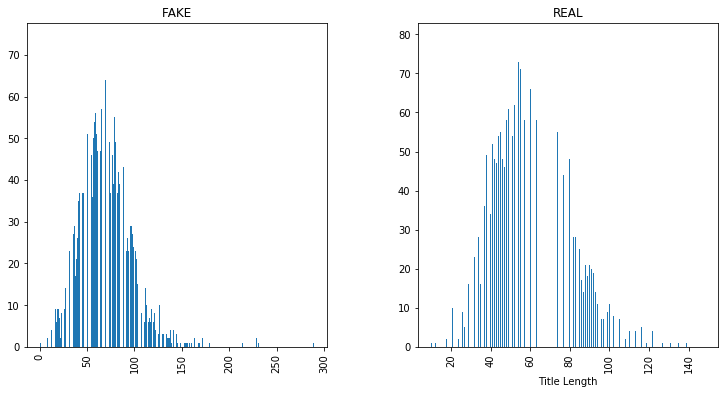

In [13]:
news.hist(column = 'title_length', by = 'label', bins=500, figsize= (12,6))
plt.xlabel('Title Length')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a24adc790>,
      dtype=object)

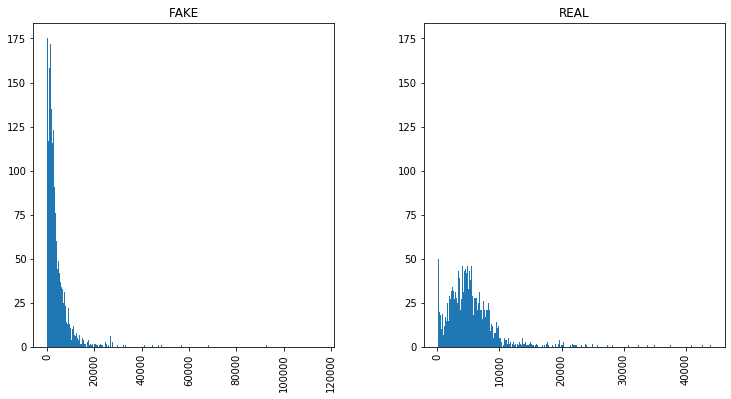

In [14]:
news.hist(column = 'text_length', by = 'label', bins=500, figsize= (12,6))

In [15]:
import string

In [16]:
from nltk.corpus import stopwords

In [17]:
def process_data(raw):
    npunc = [char for char in raw if char not in string.punctuation]
    npunc = ''.join(npunc)
    return [word for word in npunc.split() if word.lower() not in stopwords.words('english')]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [18]:
from sklearn.pipeline import Pipeline

In [35]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                    ('nbmodel', MultinomialNB())])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = news['text']
y = news['label']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nbmodel',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [40]:
pred = pipeline.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

        FAKE       0.97      0.66      0.78      1071
        REAL       0.73      0.98      0.84      1020

    accuracy                           0.82      2091
   macro avg       0.85      0.82      0.81      2091
weighted avg       0.86      0.82      0.81      2091

[[ 704  367]
 [  19 1001]]


In [25]:
#Passive aggressive classifier

In [15]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                    ('passiveaggressive', PassiveAggressiveClassifier(max_iter=50))])

In [24]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('passiveaggressive',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
      

In [25]:
pred = pipeline.predict(X_test)

In [28]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94      1071
        REAL       0.94      0.93      0.94      1020

    accuracy                           0.94      2091
   macro avg       0.94      0.94      0.94      2091
weighted avg       0.94      0.94      0.94      2091

[[1012   59]
 [  68  952]]


In [29]:
import pandas as pd
import numpy as np
news = pd.read_csv('news.csv')
news.drop('Unnamed: 0', axis=1, inplace=True)
news['title_length'] = news['title'].apply(len)
news['text_length'] = news['text'].apply(len)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
X = news['text']
y = news['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.feature_extraction.text import TfidfVectorizer

pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                    ('passiveaggressive', PassiveAggressiveClassifier(max_iter=50))])
                    
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94      1071
        REAL       0.94      0.94      0.94      1020

    accuracy                           0.94      2091
   macro avg       0.94      0.94      0.94      2091
weighted avg       0.94      0.94      0.94      2091

[[1012   59]
 [  63  957]]


In [ ]:
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(model, filename)
with open('vectorizer.pickle', 'wb') as handle:
    pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)